

#1.   Kütüphanelerin yüklenmesi



In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc, classification_report

from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers

import warnings
warnings.filterwarnings("ignore")

#2.   Veri setinin yüklenmesi ve ön işleme







In [4]:
#Veri setinin yüklenmesi
cifar10 = tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
# Eğitim verisini küçültme
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.7, stratify=y_train, random_state=42)

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
#X_train, X_test, y_train ve y_test olarak bölünmüş verilerin boyutları.
print("X_train boyut: ", X_train.shape)
print( "y_train boyut: ", y_train.shape)
print("X_test boyut: ", X_test.shape)
print("y_test boyut: ", y_test.shape)

X_train boyut:  (35000, 32, 32, 3)
y_train boyut:  (35000, 1)
X_test boyut:  (10000, 32, 32, 3)
y_test boyut:  (10000, 1)


In [6]:
#Veri seti içindeki görüntülerin boyutları.
print(f"Görüntü boyutu: {X_train.shape[1:]}")

Görüntü boyutu: (32, 32, 3)


In [7]:
#Sınıf isimleri
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Her sınıftan kaç örnek olduğunu sayma ve yazdırma
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))

print("Sınıf dağılımı (train set):")
for i in range(len(class_names)):
    print(f"{class_names[i]}: {class_counts[i]}")

Sınıf dağılımı (train set):
Airplane: 3500
Automobile: 3500
Bird: 3500
Cat: 3500
Deer: 3500
Dog: 3500
Frog: 3500
Horse: 3500
Ship: 3500
Truck: 3500


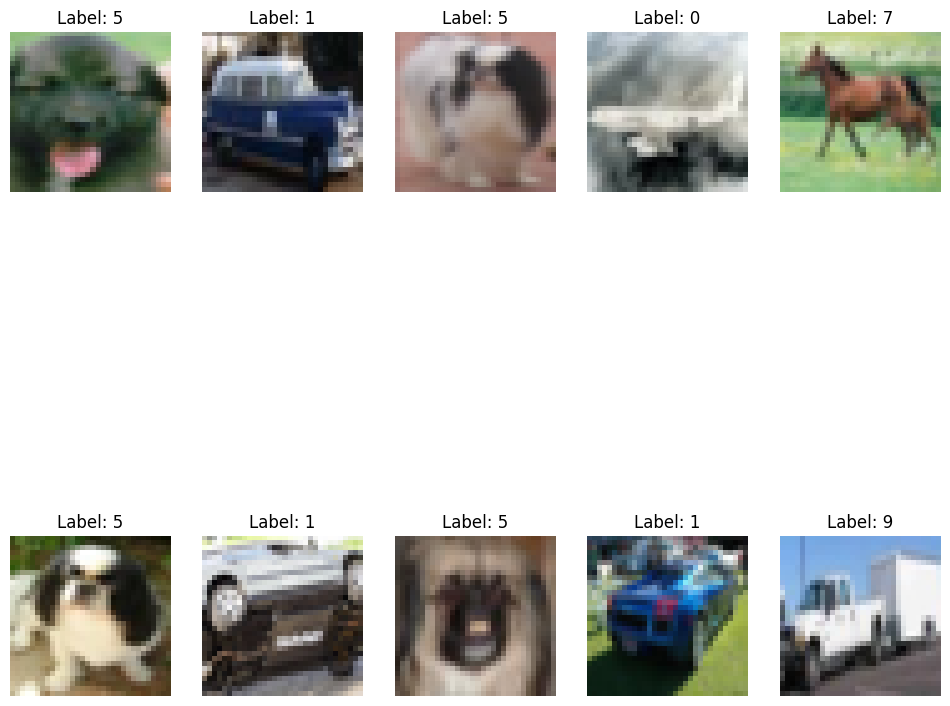

In [8]:
#Veri seti içindeki görüntüleri görselleştirme.
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
plt.show()

In [9]:
#Verileri normalize etme.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
print(f"Normalleştirilmiş X_train boyutu: {X_train.shape}")
print(f"Normalleştirilmiş X_test boyutu: {X_test.shape}")

Normalleştirilmiş X_train boyutu: (35000, 32, 32, 3)
Normalleştirilmiş X_test boyutu: (10000, 32, 32, 3)




# 3.   Makine modeli oluşturup eğitme





In [12]:
# Yeniden boyutlandırma: Verileri 32x32 görüntü formatından 1024 özellikli vektörlere düzleştirelim.
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [13]:
# Verileri standartlaştıralım
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# burayı dene

In [14]:
# SVC modelinin tanımlanması.
svc_model = SVC(kernel='rbf', C=10, random_state=42)

In [15]:
# Modeli eğitilmesi.
svc_model.fit(X_train, y_train.ravel())

SVC(C=10, random_state=42)

In [16]:
# Test seti ile tahminler yapılması.
y_pred = svc_model.predict(X_test)

In [17]:
# Doğruluk / Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Hassasiyet / Precision
precision = precision_score(y_test, y_pred ,average ='weighted')  # Modelin pozitif olarak tespit ettiği örnekleri gerçekte pozitif olan örneklere oranlar.
print("Precision: ",precision)

# Geri çağırma / Recall
recall = recall_score(y_test, y_pred, average = 'weighted')  # Gerçek pozitiflerin doğru sınıflandırılma oranını hesaplar.
print("Recall: ",recall)

# F1 skoru
f1 = f1_score(y_test, y_pred, average = 'weighted')  # Precision ve recall'un harmonik hesaplamasını hesaplar.
print("F1 Score: ",f1)

Accuracy: 0.545
Precision:  0.5475529000772832
Recall:  0.545
F1 Score:  0.5457789479018692


In [18]:
#Sınıflandırma raporu
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.64      0.62      1000
           1       0.63      0.65      0.64      1000
           2       0.41      0.44      0.42      1000
           3       0.35      0.38      0.37      1000
           4       0.50      0.47      0.48      1000
           5       0.46      0.44      0.45      1000
           6       0.59      0.58      0.58      1000
           7       0.65      0.57      0.61      1000
           8       0.68      0.68      0.68      1000
           9       0.58      0.60      0.59      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



In [19]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[640  35  61  22  25  18  18  20 113  48]
 [ 39 649  18  34  11  13  16  15  43 162]
 [ 78  20 437  88 124  82  82  49  15  25]
 [ 34  29  99 380  67 174 100  48  22  47]
 [ 46   9 156  67 472  60  82  70  20  18]
 [ 34  14  85 218  65 442  55  47  19  21]
 [ 18  21 106 106  89  44 576  13  12  15]
 [ 28  24  57  81  72  82  14 573  10  59]
 [ 90  66  22  34  21  21  10  11 677  48]
 [ 45 156  16  45   6  21  19  29  59 604]]


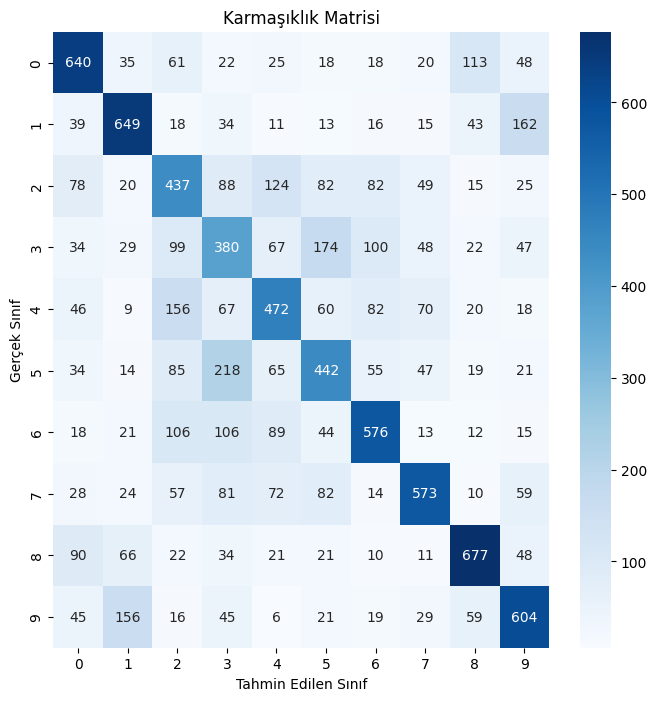

In [36]:
# cm grafiği
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()


# 4. Derin öğrenme modeli oluşturma ve eğitme



In [21]:
#Veri setinin yüklenmesi
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Eğitim verisini küçültme
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.7, stratify=y_train, random_state=42)

In [22]:
#Veri normalleştirme.
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32') / 255.0

In [23]:
# CNN modeli oluşturma
model = Sequential([
    # Evrişim katmanı 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Evrişim katmanı 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Evrişim katmanı 3
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    # Tam bağlantı katmanı 1
    Dense(256, activation='relu'),
    Dropout(0.5),
    # Çıkış katmanı
    Dense(10, activation='softmax')
])

In [24]:
# Modelin derlenmesi
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [25]:
# Modelin özeti
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [26]:
# Modelin eğitimi
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1094/1094 [==============================] - 22s 19ms/step - loss: 1.7103 - accuracy: 0.3685 - val_loss: 1.3328 - val_accuracy: 0.5345
Epoch 2/10
1094/1094 [==============================] - 19s 17ms/step - loss: 1.3371 - accuracy: 0.5205 - val_loss: 1.1873 - val_accuracy: 0.5751
Epoch 3/10
1094/1094 [==============================] - 19s 17ms/step - loss: 1.2033 - accuracy: 0.5735 - val_loss: 1.0932 - val_accuracy: 0.6142
Epoch 4/10
1094/1094 [==============================] - 19s 17ms/step - loss: 1.1087 - accuracy: 0.6109 - val_loss: 1.0780 - val_accuracy: 0.6183
Epoch 5/10
1094/1094 [==============================] - 19s 18ms/step - loss: 1.0358 - accuracy: 0.6369 - val_loss: 0.9864 - val_accuracy: 0.6525
Epoch 6/10
1094/1094 [==============================] - 20s 18ms/step - loss: 0.9752 - accuracy: 0.6591 - val_loss: 0.9118 - val_accuracy: 0.6839
Epoch 7/10
1094/1094 [==============================] - 19s 18ms/step - loss: 0.9287 - accuracy: 0.6752 - val_loss: 0.9158 -

In [27]:
# Test veri seti üzerinde modelin performansını değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - loss: 0.8605 - accuracy: 0.7064 - 2s/epoch - 6ms/step
Test accuracy: 0.7063999772071838


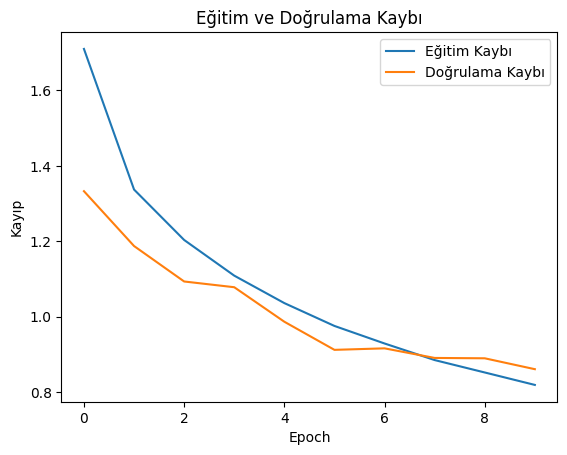

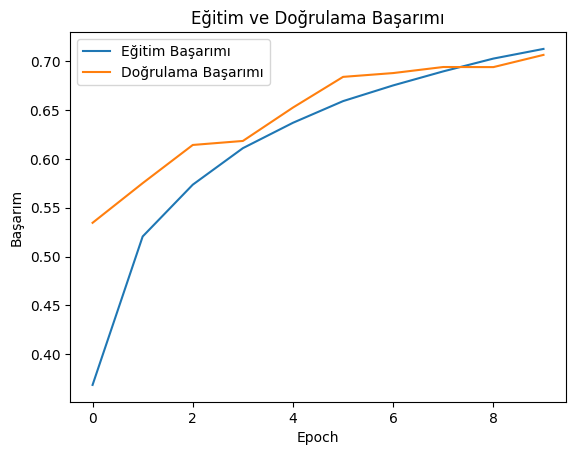

In [29]:
# Eğitim ve doğrulama kayıplarını çizdirme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Eğitim ve doğrulama başarımlarını çizdirme
plt.plot(history.history['accuracy'], label='Eğitim Başarımı')
plt.plot(history.history['val_accuracy'], label='Doğrulama Başarımı')
plt.title('Eğitim ve Doğrulama Başarımı')
plt.xlabel('Epoch')
plt.ylabel('Başarım')
plt.legend()
plt.show()